$${\bf Name}:\text{  Mainak Biswas}$$

$$ \text {IISc, PhD student, PMRF Lecture (Assignment 3 - solutions)} $$

In [1]:
# importing relevant packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Question 2 (ii) - Discriminant Functions

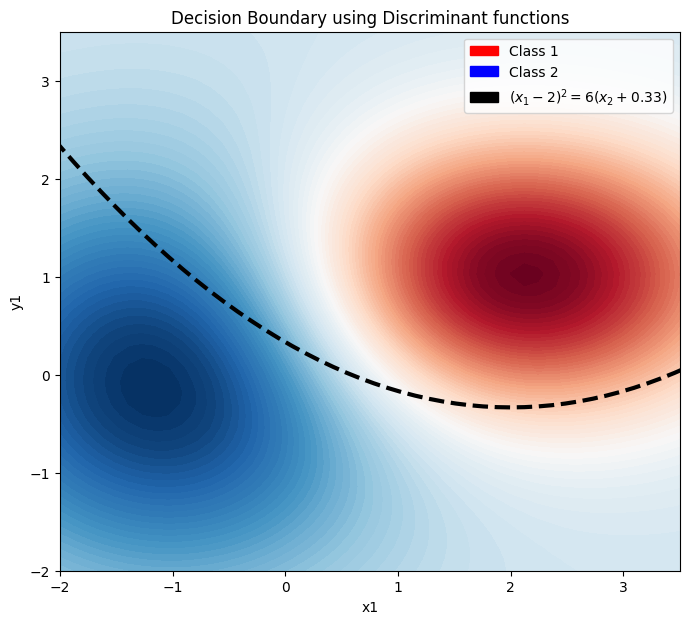

In [2]:
#this implements the contours of the distributions of the 2 classes and their decision boundary
#the equation is (let x2 = y, and x1 = x -- please forgive the overloading of notations if any)
#D(x, y) => (x-2)^2 = 6(y+1/3)
#class 1: X | C1  ~ N([1 2], [[1 0], [0 2]])
#class 2: X | C2 ~ N([0 -1], [[2 0], [0 2]])

#calculate the value of the normal at these points
def pdf_normal(x, mu, sigma, sigma_inv):
    d = x.shape[0]
    scale = ((np.linalg.det(sigma)) * ((2*np.pi)**d))**0.5
    return np.exp(-0.5*(x-mu).T @ sigma_inv @ (x-mu))/scale

def plot_df_q2():
    #set constants for 1st class
    mu_1 = np.array([[1.], [2.]])
    sigma_1 = np.array([[1., 0.], [0., 2.]])
    sigma_inv_1 = np.array([[1., 0.], [0., 0.5]])
    
    #set constants for 2nd class
    mu_2 = np.array([[0.], [-1.]])
    sigma_2 = np.array([[2.0, 0.], [0., 2.0]])
    sigma_inv_2 = np.array([[0.5, 0.], [0., 0.5]])
    
    #set the range
    x = np.linspace(-6, 6, num=100)
    y = np.linspace(-6, 6, num=100)
    
    #fill the values of the pdf
    pdf_c1 = np.zeros((x.shape[0], y.shape[0]))
    pdf_c2 = np.zeros((x.shape[0], y.shape[0]))
    for i in range(x.shape[0]):
        for j in range(y.shape[0]):
            pdf_c1[i, j] = pdf_normal(np.array([[x[i]], [y[j]]]), mu_1, sigma_1, sigma_inv_1)
            #density multiplied with -1 to represent the other class
            pdf_c2[i, j] = pdf_normal(np.array([[x[i]], [y[j]]]), mu_2, sigma_2, sigma_inv_2)
    #just for visualization purposes
    pdf_c = pdf_c1 - pdf_c2
    
    fig, ax = plt.subplots(figsize=(8, 7))
    #ax.contour(x, y, pdf_c1, levels=20, linewidths=0.5, colors='k')
    
    #ax.contour(x, y, pdf_c2, levels=20, linewidths=0.5, colors='k')
    #ax.contour(x, y, pdf_c1, levels=20, linewidths=0.5, colors='k')
    contour1 = ax.contourf(x, y, pdf_c, levels=100, cmap="RdBu_r")
    plt.xlim([-2.0, 3.5])
    plt.ylim([-2.0, 3.5])
    plt.xlabel("x1")
    plt.ylabel("y1")
    plt.title("Decision Boundary using Discriminant functions")
    #plotting the curve (d_x, d_y):
    d_y = ((x - 2.)**2)/6 - 1/3 
    plt.plot(x, d_y, color='k', linewidth=3, linestyle='--')
    #legends
    red_patch = mpatches.Patch(color='red', label='Class 1')
    blue_patch = mpatches.Patch(color='blue', label='Class 2')
    boundary = mpatches.Patch(color='k', label='$(x_1-2)^2 = 6(x_2 + 0.33)$')
    plt.legend(handles=[red_patch, blue_patch, boundary])
plot_df_q2()

# Question 3 (ii) - SMO optimization

In [92]:
def quadratic_solver_smo(w0, w1, w2, w3, w4, w5, y1, y2, t, c):
    # alpha1 y1 + alpha2 y2 = c
    #yields: gamma2 alpha^2 + gamma1 alpha + gamma0
    gamma2 = - w4 - w5 + w3*y1*y2
    gamma1 = w1 - w2*y1*y2 - w3*t*y2 + 2.0*w5*t*y1
    gamma0 = w0 + w2*t*y2 - w5 * (t**2)

    # now finding the limits between which we want to optimize alpha1 \in [l1, l2]
    if y1*y2 == 1:
        l1 = np.max([0, t*y1 - c])
        l2 = np.min([c, t*y1])
    else:
        l1 = np.max([t*y1, 0])
        l2 = np.min([c, t*y1 + c])
    extrema = -1*gamma1/(2*gamma2)
    #now writing the analytical solution
    if gamma2 > 0:
        if extrema <= 0.5 * (l1 + l2):
            alpha1_opt = l2
        else:
            alpha1_opt = l1
    elif gamma2<0:
        if extrema >= l1 and extrema <=l2:
            alpha1_opt = extrema
        elif extrema < l1:
            alpha1_opt = l1
        else:
            alpha1_opt = l2
    # incase it is just a line
    else: 
        if gamma1 < 0:
            alpha1_opt = l1
        else:
            alpha1_opt = l2
    alpha2_opt = (t - alpha1_opt * y1)/y2
    opt_value = w0 + w1*alpha1_opt + w2*alpha2_opt - w3*alpha1_opt*alpha2_opt - w4*alpha1_opt**2 - w5*alpha2_opt**2
    print("alpha_1* = {} \nalpha_2* = {} \nL* = {}".format(np.round(alpha1_opt, 2), np.round(alpha2_opt+1e-9, 2), np.round(opt_value, 2)))
    return alpha1_opt, alpha2_opt, opt_value

In [95]:
#ty = alpha1 + alpha2 (if same sign) so 0 < t < 2c, if opposite: t = alpha1 - alpha2 => -c < t < c
#and check [[w4 w3/2], [w3/2 w5]] is psd 
#opposite sign
quadratic_solver_smo(w0 = 2.0, w1 = -3.0, w2 = -5.0, w3 = 6.0, w4=6 , w5 =4 , y1=1, y2=-1, t=0.5, c=1)

alpha_1* = 0.5 
alpha_2* = 0.0 
L* = -1.0


(0.5, -0.0, -1.0)

In [96]:
#same sign
quadratic_solver_smo(w0 = 2.0, w1 = 1.5, w2 = -2.72, w3 = 6.0, w4=3 , w5 =8 , y1=1, y2=1, t=2, c=3)

alpha_1* = 2 
alpha_2* = 0.0 
L* = -7.0


(2, 0.0, -7.0)

In [87]:
#checking by using cvxopt
def check_using_inbuilt(w0, w1, w2, w3, w4, w5, y1, y2, t, c):
  import cvxpy as optimizer
  #in case it is psd it takes approximate eigenvalues (i.e. if it has eigenvalues = true)
  G = optimizer.Parameter(shape=(2,2), value=np.array([[w4, w3/2], [w3/2, w5]]), PSD=True)


  w12 = np.array([[w1], [w2]])
  y = np.array([[y1], [y2]])
  #alpha (dual variable)
  alpha = optimizer.Variable((2, 1))
  #quad_form -> alpha^T G alpha
  L =  w0 + w12.T @ alpha - optimizer.quad_form(alpha, G)
  #equality, inequalities are considered element wise
  optim_prob = optimizer.Problem(optimizer.Maximize(L), constraints=[alpha <= c, alpha >= 0, alpha.T @ y == t])
  
  optim_prob.solve(solver=optimizer.OSQP)
  opt_value = w0 + w1*alpha.value[0, 0] + w2*alpha.value[1, 0] - w3*alpha.value[0, 0]*alpha.value[1, 0] - w4*(alpha.value[0, 0]**2) - w5*(alpha.value[1,0]**2)
  print("alpha_1* = {} \nalpha_2* = {} \nL* = {}".format(np.round(alpha.value[0,0], 2), np.round(alpha.value[1, 0]+ 1e-9, 2), np.round(opt_value, 2)))
  

In [88]:
check_using_inbuilt(w0 = 2.0, w1 = -3.0, w2 = -5.0, w3 = 6.0, w4=6 , w5 =4 , y1=1, y2=-1, t=0.5, c=1)

alpha_1* = 0.5 
alpha_2* = 0.0 
L* = -1.0


In [97]:
check_using_inbuilt(w0 = 2.0, w1 = 1.5, w2 = -2.72, w3 = 6.0, w4=3 , w5 =8 , y1=1, y2=1, t=2, c=3)

alpha_1* = 2.0 
alpha_2* = 0.0 
L* = -7.0


/hdd_home/anaconda/envs/deep_learning_mainak/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:235: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Disciplined Parametrized Programming, at https://www.cvxpy.org/tutorial/dpp/index.html
  warnings.warn(DPP_ERROR_MSG)


**Perfect! The inbuilt function and our implementation match exactly!!**

# Question 5 - MLPs and Logistic Regression

In [5]:
from sklearn.datasets import fetch_openml

X_mnist, y_mnist = fetch_openml("mnist_784",version=1,return_X_y=True,as_frame=False)

/hdd_home/anaconda/envs/deep_learning_mainak/lib/python3.9/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [6]:
#make the data into usable form
y_mnist = y_mnist.astype('int')
X_mnist = X_mnist/255.0

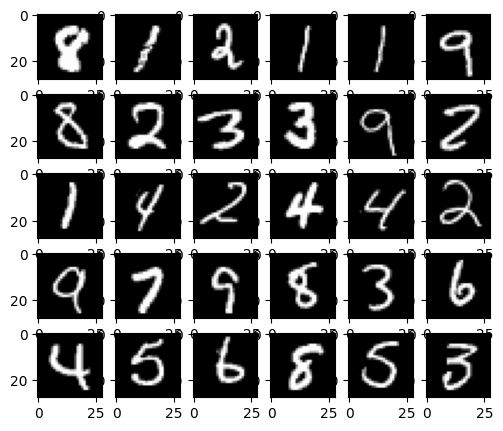

In [7]:
def display_grid(list_conn, num_col):
    num_row = int(list_conn.shape[0]/num_col)
    
    fig, axes = plt.subplots(num_row, num_col, figsize=(num_col,num_row))
    for i in range(num_col*num_row):
        #ax.set_title("Conn. matrix (log scale), S = "+str(i+1), fontsize=12)
        ax = axes[i%num_row, int(i/num_row)]
        full_im = ax.imshow(list_conn[i].reshape((28,28)), cmap='gray')
    
    #make room for the colourbar on the right and plot it
    fig.subplots_adjust(right=0.88)
    plt.show()

display_grid(X_mnist[np.random.choice(np.arange(X_mnist.shape[0]), 30)], 6)

In [8]:
# divide the data into train, test and cv in a stratified manner:  all have equal samples 
def onehot_encode(y, nclasses):
    Y = np.zeros((y.shape[0], nclasses))   #make a Nxk 
    Y[np.arange(y.shape[0]), y] = 1
    return Y
    
def stratified_train_validation_test(X, y, nclasses=10):
    np.random.seed(24)   #so that the same split is obtained always
    list_train = [] 
    list_cv = []
    list_test = []
    for label in np.unique(y):
        indices = np.where(y==label)[0]
        np.random.shuffle(indices)
        list_train += list(indices[0:int(len(indices)*4/7)])
        list_cv += list(indices[int(len(indices)*4/7) : int(len(indices)*5/7)])
        list_test += list(indices[int(len(indices)*5/7) : ])
    X_train = X[list_train]
    y_train = y[list_train]
    X_cv = X[list_cv]
    y_cv = y[list_cv]
    X_test = X[list_test]
    y_test = y[list_test]

    
    return X_train, onehot_encode(y_train, nclasses), X_cv, onehot_encode(y_cv, nclasses), X_test, onehot_encode(y_test, nclasses)
X_train, y_train, X_cv, y_cv, X_test, y_test = stratified_train_validation_test(X_mnist, y_mnist)

In [9]:
print(X_train.shape, y_train.shape, X_cv.shape, y_cv.shape, X_test.shape, y_test.shape)

(39997, 784) (39997, 10) (9999, 784) (9999, 10) (20004, 784) (20004, 10)


# (a) MLP - classification

In [10]:
##THE DNN module
#(X_t, y) is here to train the neural network now
#according to our notation psi is the activation function
    
class MLP:
    def __init__(self, X_train, y_train, arch_details):
        self.X_train = X_train
        self.y_train = y_train
        self.parameters = {}
        #architechture details has the information regarding number of layers (length of the array), and number of units
        self.arch_details = arch_details
        self.initialize_weights()
    
    def initialize_weights(self):
        for i in range(1, len(self.arch_details)):
            #since all the data is in 0 mean std 1 distribution, rescaling the weight by multiplying with a fraction
            self.parameters["W_"+str(i)] = np.random.normal(0, 0.01, size=(self.arch_details[i], self.arch_details[i-1]))
            self.parameters["b_"+str(i)] = np.zeros((self.arch_details[i], 1))
    
    def relu(self, V):
        #only using ReLU activation functions (as all the targets are positive), throughout
        #Relu(x) = max(0, x)
        return np.maximum(V, 0)
    
    def d_relu(self, V):
        #the gradeint is d_psi/dV
        #1E-9 is for numerical stability
        return np.maximum(V/(np.abs(V)+1E-9), 0)

    def softmax(self, x):
        return np.exp(x)/np.sum(np.exp(x), axis=0, keepdims=True)
    
    def cross_entropy(self, Z_L, y):
        #cross entropy loss
        
        L = -1*np.sum(y*np.log(Z_L + 1e-9))
        return L/(y.shape[1]*y.shape[0])
        
    def d_cross_entropy(self, Z_L, y):
        #derivative done in the assignment theory - 
        #derivative of the cost with respect to Z_L is the error itself
        return Z_L - y  #error (a vector)
  
    #helper function will pass batches and not the entire data
    def forward_prop(self, X_b):
        outputs = {}
        outputs["Z_0"] = X_b 
        for i in range(1, len(self.arch_details)):
            #V_i = W_i Z_{i-1} + b_i
            outputs["V_"+str(i)] = self.parameters["W_"+str(i)].dot(outputs["Z_"+str(i-1)]) + self.parameters["b_"+str(i)]
            #relu is the activation function
            if i == len(self.arch_details) - 1:
                #for the output layer
                outputs["Z_"+str(i)] = self.softmax(outputs["V_"+str(i)])
            else:
                outputs["Z_"+str(i)] = self.relu(outputs["V_"+str(i)]) 
        return outputs

    def back_prop(self, X_b, y_b):
        gradients = {}
        #get results of forward prop: useful for backprop
        outputs = self.forward_prop(X_b)
        loss = self.cross_entropy(outputs["Z_"+str(len(self.arch_details)-1)], y_b)
        #base case
        gradients["dZ_"+str(len(self.arch_details)-1)] = self.d_cross_entropy(outputs["Z_"+str(len(self.arch_details)-1)], y_b) 
        for i in range(len(self.arch_details)-1, 0, -1):
            gradients["del_"+str(i)] = gradients["dZ_"+str(i)]*self.d_relu(outputs["V_"+str(i)])
            gradients["dW_"+str(i)] = gradients["del_"+str(i)].dot(outputs["Z_"+str(i-1)].T)/(X_b.shape[1] * y_b.shape[0])
            #sum of columns
            gradients["db_"+str(i)] = np.sum(gradients["del_"+str(i)], axis=1, keepdims=True)/(X_b.shape[1] * y_b.shape[0])
            #print(i)
            gradients["dZ_"+str(i-1)] = self.parameters["W_"+str(i)].T.dot(gradients["del_"+str(i)]) 
  
        return gradients, loss

    def predict(self, X):
        outs = self.forward_prop(X)
        return outs["Z_"+str(len(self.arch_details)-1)]

    def grad_descent(self, bs, lr, epochs):
        cost = []
        #1 epoch is 1 traversal through the training data
        epoch_l = int(np.ceil(self.X_train.shape[1]/bs))
        indices = np.arange(self.X_train.shape[1])
        for i in range(epochs):
            np.random.shuffle(indices)
            for itr in range(epoch_l):
                if itr == epoch_l - 1:
                    end_pos = self.X_train.shape[1]
                else:
                    end_pos = (itr+1)*bs
                X_b, y_b = self.X_train[:, indices[itr*bs:end_pos]], self.y_train[:, indices[itr*bs:end_pos]]
                gradients, loss = self.back_prop(X_b, y_b)
                cost.append(loss)
                #update the weights
                for j in range(1, len(self.arch_details)):
                    self.parameters["W_"+str(j)] = self.parameters["W_"+str(j)] - lr*gradients["dW_"+str(j)]
                    self.parameters["b_"+str(j)] = self.parameters["b_"+str(j)] - lr*gradients["db_"+str(j)]
            if i%5==0:
                print("Cost after epoch "+str(i+1)+": "+str(cost[-1]))
        return cost

In [11]:
def plot_curve1(pts, x_label, y_label, title):
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)

  index = np.arange(1, len(pts)+1, 1)
  plt.plot(index, pts, '-b')
  
  plt.show()

def calculate_accuracy(y_act, y_pred):
    act_index = np.argmax(y_act, axis=0)
    pred_index = np.argmax(y_pred, axis=0)
    return np.sum(act_index == pred_index)/y_act.shape[1]

W_1:  (10, 784)
b_1:  (10, 1)
Cost after epoch 1: 0.12831497692670535
Cost after epoch 6: 0.0348816611194964
Cost after epoch 11: 0.036607739076048584
Cost after epoch 16: 0.024660329026919732
Cost after epoch 21: 0.05731134039597294
Cost after epoch 26: 0.03340179289229708
Cost after epoch 31: 0.03201346204682761
Cost after epoch 36: 0.03163784973553515
Cost after epoch 41: 0.026897530855523738
Cost after epoch 46: 0.055316846502372535
Cost after epoch 51: 0.035716135057057584
Cost after epoch 56: 0.03574908066347412
Cost after epoch 61: 0.03507925245971659
Cost after epoch 66: 0.026378940957515723
Cost after epoch 71: 0.03512285532590954
Cost after epoch 76: 0.046061538116603
Cost after epoch 81: 0.02528600596394998
Cost after epoch 86: 0.01591213429641307
Cost after epoch 91: 0.02957061447687961
Cost after epoch 96: 0.030730886439875628


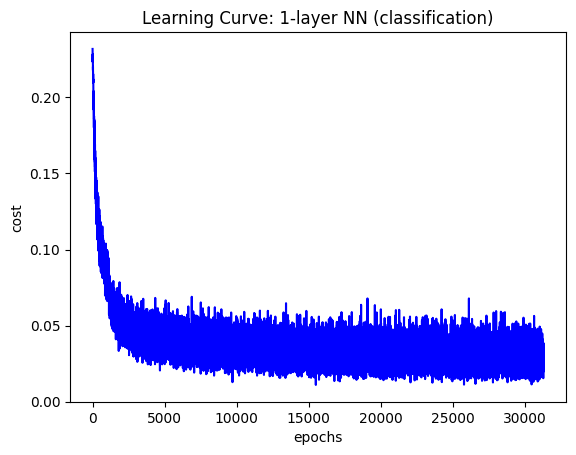

1 layer NN accuracy:  0.91


In [12]:
# 3 models to choose from
#model 1: 1 layer / 0 hidden layer: equivalent to softmax regression
arch_details_1 = [784, 10]
#instantiate the model
mlp_model = MLP(X_train.T, y_train.T, arch_details_1)

for i in range(1, len(arch_details_1)):
  print("W_"+str(i)+": ", mlp_model.parameters["W_"+str(i)].shape)
  print("b_"+str(i)+": ", mlp_model.parameters["b_"+str(i)].shape)
    
bs=128
lr = 0.1
cost = mlp_model.grad_descent(bs, lr, 100)
plot_curve1(cost, "epochs", "cost", "Learning Curve: 1-layer NN (classification)")

y_cv_pred = mlp_model.predict(X_cv.T)

print("1 layer NN accuracy: ", np.round(calculate_accuracy(y_cv.T, y_cv_pred), 2))

W_1:  (256, 784)
b_1:  (256, 1)
W_2:  (10, 256)
b_2:  (10, 1)
Cost after epoch 1: 0.21470348743331555
Cost after epoch 6: 0.05571037253862192
Cost after epoch 11: 0.051217334252502085
Cost after epoch 16: 0.04647499147140877
Cost after epoch 21: 0.03406298797856788
Cost after epoch 26: 0.03632083637562124
Cost after epoch 31: 0.03023203703658408
Cost after epoch 36: 0.02627768148465572
Cost after epoch 41: 0.022792135063670723
Cost after epoch 46: 0.027768136601381985
Cost after epoch 51: 0.041874786676870744
Cost after epoch 56: 0.047621179217785206
Cost after epoch 61: 0.022558730820389256
Cost after epoch 66: 0.028231518725649142
Cost after epoch 71: 0.032267125391712476
Cost after epoch 76: 0.019929794223047446
Cost after epoch 81: 0.01713546518111735
Cost after epoch 86: 0.026736751398917118
Cost after epoch 91: 0.009955440016019685
Cost after epoch 96: 0.007166601433245444


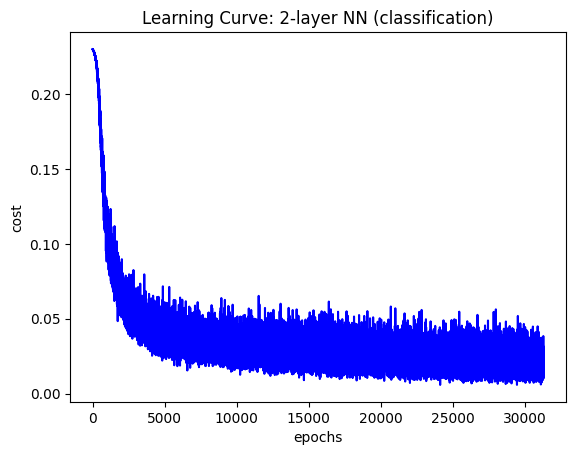

2 layer NN accuracy:  0.94


In [13]:
# 3 models to choose from
#model 2: 2 layer / 1 hidden layer: equivalent to softmax regression
arch_details_2 = [784, 256, 10]
#instantiate the model
mlp_model_2 = MLP(X_train.T, y_train.T, arch_details_2)

for i in range(1, len(arch_details_2)):
  print("W_"+str(i)+": ", mlp_model_2.parameters["W_"+str(i)].shape)
  print("b_"+str(i)+": ", mlp_model_2.parameters["b_"+str(i)].shape)
    
bs=128
lr = 0.1
cost = mlp_model_2.grad_descent(bs, lr, 100)
plot_curve1(cost, "epochs", "cost", "Learning Curve: 2-layer NN (classification)")

y_cv_pred = mlp_model_2.predict(X_cv.T)

print("2 layer NN accuracy: ", np.round(calculate_accuracy(y_cv.T, y_cv_pred), 2))

W_1:  (256, 784)
b_1:  (256, 1)
W_2:  (128, 256)
b_2:  (128, 1)
W_3:  (10, 128)
b_3:  (10, 1)
Cost after epoch 1: 0.23028488811549436
Cost after epoch 6: 0.22835178218001687
Cost after epoch 11: 0.16943718723514398
Cost after epoch 16: 0.11546186565098984
Cost after epoch 21: 0.07935378806846535
Cost after epoch 26: 0.07071149655590575
Cost after epoch 31: 0.08997276351965836
Cost after epoch 36: 0.07194603162637
Cost after epoch 41: 0.05389275402310362
Cost after epoch 46: 0.060649136173577804
Cost after epoch 51: 0.04441628189952685
Cost after epoch 56: 0.04259449617489955
Cost after epoch 61: 0.054921904795511386
Cost after epoch 66: 0.04894069070684987
Cost after epoch 71: 0.0798796090183762
Cost after epoch 76: 0.053808936835742185
Cost after epoch 81: 0.035720147643050475
Cost after epoch 86: 0.044190193032685746
Cost after epoch 91: 0.045474845832484276
Cost after epoch 96: 0.03920063484185499


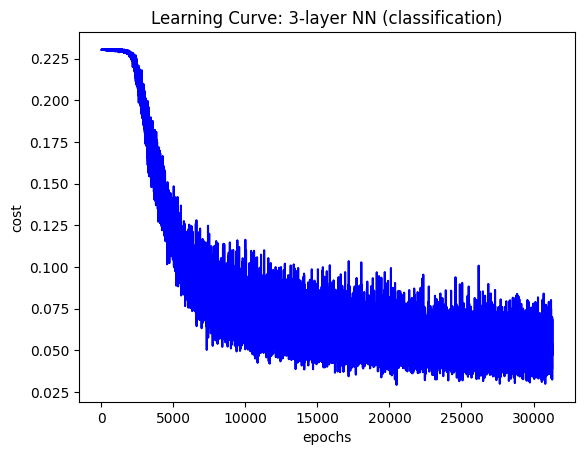

3 layer NN accuracy:  0.76


In [14]:
# 3 models to choose from
#model 3: 3 layer / 2 hidden layer: equivalent to softmax regression
arch_details_3 = [784, 256, 128, 10]
#instantiate the model
mlp_model_3 = MLP(X_train.T, y_train.T, arch_details_3)

for i in range(1, len(arch_details_3)):
  print("W_"+str(i)+": ", mlp_model_3.parameters["W_"+str(i)].shape)
  print("b_"+str(i)+": ", mlp_model_3.parameters["b_"+str(i)].shape)
    
bs=128
lr = 0.1
cost = mlp_model_3.grad_descent(bs, lr, 100)
plot_curve1(cost, "epochs", "cost", "Learning Curve: 3-layer NN (classification)")

y_cv_pred = mlp_model_3.predict(X_cv.T)

print("3 layer NN accuracy: ", np.round(calculate_accuracy(y_cv.T, y_cv_pred), 2))

Accuracy on test set by model selected by cross-validation (2 layer NN) -   0.94


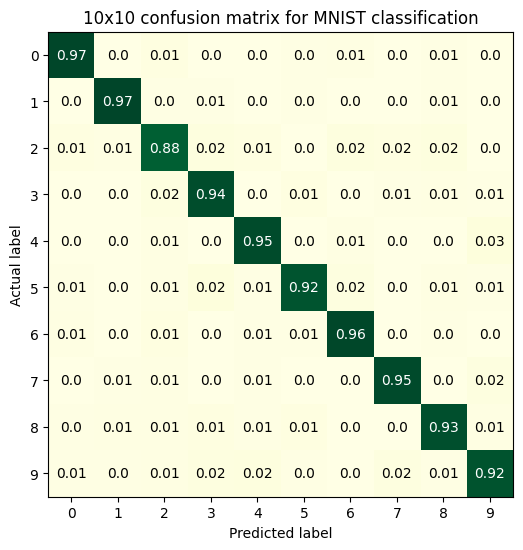

In [45]:
#So best model we have is 2 layer neural network - based on cv data
def display_confusion_matrix(y, y_pred, n, title_="10x10 confusion matrix for MNIST classification", labels_ = np.arange(10)):
    if n > 2:    #get the index
        y = np.argmax(y, axis=0).astype('int')
        y_pred = np.argmax(y_pred, axis=0).astype('int')
    else:
        #binary classification
        y_pred = (y_pred >= 0.5).astype('int')
    
    confusion_matrix = np.zeros((n, n))
    n_sample_per_class = np.zeros((n, 1))
    for i in range(n):
        n_sample_per_class[i, 0] = np.sum(y == i)
    for i in range(y.shape[0]):
        confusion_matrix[y[i], y_pred[i]] += 1

    confusion_matrix = confusion_matrix / n_sample_per_class
    
    fig, ax = plt.subplots(figsize=(6, 8))
    heatmap = ax.imshow(confusion_matrix, cmap="YlGn")
    
    ax.set_xticks(np.arange(n), labels=labels_)
    ax.set_yticks(np.arange(n), labels=labels_)
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.title(title_)
    for i in range(n):
        for j in range(n):
            if i == j:
                col = 'w'
            else:
                col = 'k'
            text = ax.text(j, i, np.round(confusion_matrix[i, j], 2), ha="center", va="center", color=col)
    return confusion_matrix
    
def display_test_results(model, X, y):
    y_pred = model.predict(X.T)
    print("Accuracy on test set by model selected by cross-validation (2 layer NN) -  ", np.round(calculate_accuracy(y.T, y_pred), 2))

    #display the contingency table
    display_confusion_matrix(y.T, y_pred, y.shape[1])
    
    
    
display_test_results(mlp_model_2, X_test, y_test)

# (b) Logistic Regression

In [16]:
def stratified_train_test_logistic(X, y, nclasses=10):
    np.random.seed(24)   #so that the same split is obtained always
    list_train = [] 
    list_cv = []
    list_test = []
    for label in np.unique(y):
        indices = np.where(y==label)[0]
        np.random.shuffle(indices)
        list_train += list(indices[0:int(len(indices)*6/7)])
        list_test += list(indices[int(len(indices)*6/7) : ])
    
    X_train_logistic = X[list_train]
    y_train_logistic = y[list_train]
    
    X_test_logistic = X[list_test]
    y_test_logistic = y[list_test]

    return X_train_logistic, y_train_logistic, X_test_logistic, y_test_logistic

X_train_logistic, y_train_logistic, X_test_logistic, y_test_logistic = stratified_train_test_logistic(X_mnist, y_mnist, nclasses=10)

In [17]:
print(X_train_logistic.shape, y_train_logistic.shape, X_test_logistic.shape, y_test_logistic.shape)

(59996, 784) (59996,) (10004, 784) (10004,)


In [22]:
# logistic regression
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

#with gradient descent
def loss_f_logistic(X, w, y):
    y_hat = np.squeeze(sigmoid(X@w))
    #binary cross entropy loss
    L = -1*np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
    return L/len(y)
    
def gradient_logistic(X, w, y):
    error = sigmoid(X@w)- np.expand_dims(y, axis=1)
    
    #vectorized implementation: parallelize in numpy  = X^T(sigmoid(Xw) - y)/m
    return (X.T @ error)/len(y)


def learn_params_logistic(X, y, lr, num_epochs):
    w = np.zeros(shape=(X.shape[1], 1))
    
    loss = []
    for i in range(num_epochs):
        w = w - lr*gradient_logistic(X, w, y)
        loss.append(loss_f_logistic(X, w, y))
    return w, loss

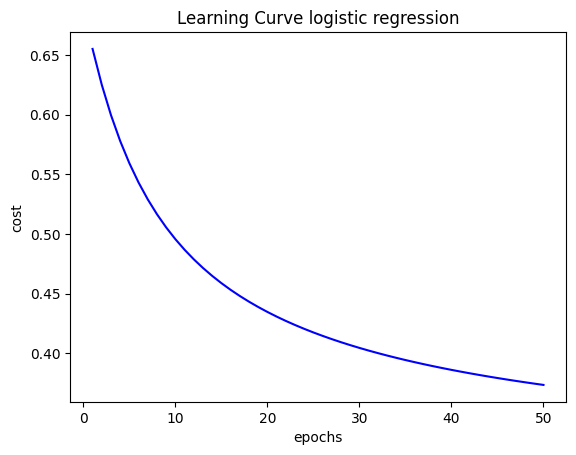

In [51]:
def train_test_logistic(X_train, y_train):
    #odd numbers - 1
    #Even numbers - 0 
    y_train = y_train % 2
    #add 1s to allow bias in regression
    X_train = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1)
    w, loss = learn_params_logistic(X_train, y_train, 0.1, 50)
    
    plot_curve1(loss, "epochs", "cost", "Learning Curve logistic regression")
    return w
    
w = train_test_logistic(X_train_logistic, y_train_logistic)    

Logistic Regression accuracy (odd-even):  0.85
Precision: 0.84 
Recall: 0.84 
F1-score: 0.84


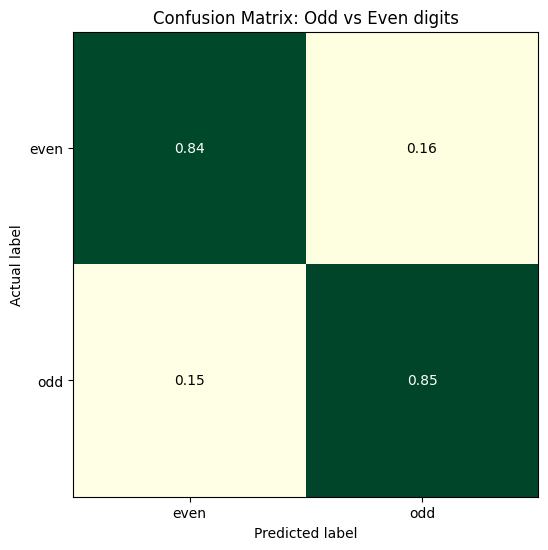

In [52]:
def display_logistic_performance(X, y):
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    y = y%2
    pred_y = (np.squeeze(sigmoid(X@w)) > 0.5).astype('int')
    
    acc = np.sum(y==pred_y)/y.shape[0]
    print("Logistic Regression accuracy (odd-even): ", np.round(acc, 2))
    #reusing general code for confusion matrix
    confusion_matrix = display_confusion_matrix(y, pred_y, 2, "Confusion Matrix: Odd vs Even digits", ['even', 'odd'])

    #other metric - in terms of predicting even (consider it the +ve class)
    n0 = np.sum(y == 0).astype('int')
    n1 = np.sum(y == 1).astype('int')
    #p = TP/()
    precision = (confusion_matrix[0, 0]*n0)/(confusion_matrix[0, 0]*n0 + confusion_matrix[1, 0]*n1)
    recall = (confusion_matrix[0, 0]*n0)/(confusion_matrix[0, 0]*n0 + confusion_matrix[0, 1]*n0)
    F1_score = 2*precision*recall/(precision + recall)
    print("Precision: {} \nRecall: {} \nF1-score: {}".format(np.round(precision, 2), np.round(recall, 2), np.round(F1_score, 2)))
display_logistic_performance(X_test_logistic, y_test_logistic)